In [42]:
#load tools
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing as prep
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt

In [3]:
#load file 1
confirmed_data = pd.read_csv("time_series_covid19_confirmed_global.csv")
confirmed_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,42033,42092,42297,42463,42609,42795,42969,43035,43240,43403
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,23705,24206,24731,25294,25801,26211,26701,27233,27830,28432
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,61381,62051,62693,63446,64257,65108,65975,66819,67679,68589
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,5319,5383,5437,5477,5567,5616,5725,5725,5872,5914
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,12335,12433,12680,12816,12953,13053,13228,13374,13451,13615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,57657,58158,58838,59422,60065,60784,61514,62167,63031,63867
265,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2070,2070,2071,2071,2071,2071,2072,2072,2072,2078
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,16908,16954,16971,16997,17036,17056,17093,17097,17123,17187


In [4]:
#load file 2
deaths_data = pd.read_csv("time_series_covid19_deaths_global.csv")
deaths_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1556,1558,1574,1577,1581,1591,1595,1605,1617,1626
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,557,559,571,579,590,598,605,612,623,631
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2036,2048,2062,2077,2093,2111,2124,2139,2154,2168
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,76,76
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,303,307,308,308,312,315,317,322,322,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,512,515,521,533,538,542,548,558,565,572
265,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,602,602,605,605,605,605,605,605,605,605
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,349,349,349,350,350,350,350,350,353,353


In [5]:
#load file 3
recovered_data = pd.read_csv("time_series_covid19_recovered_global.csv")
recovered_data 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,34446,34458,34721,34954,34967,35024,35036,35067,35092,35137
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,12002,12092,12203,12353,12493,12574,12667,12767,12889,13453
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,41783,42037,42325,42626,42980,42980,43779,44199,44633,45148
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,4043,4248,4332,4405,4488,4585,4675,4675,4747,4830
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,5647,5899,5927,6036,6125,6250,6326,6345,6444,6523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,49975,50407,50877,51425,52226,52861,53367,53791,54346,54953
252,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
253,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1375,1375,1394,1394,1394,1394,1394,1394,1394,1406
254,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,15873,15950,16011,16019,16070,16102,16134,16137,16137,16400


So all the data seems to be in order and identified by a common index among the three files, but I am only interested in the cumulative values for each location rather than individual values per date. I will add up the values for each file first.

Starting with confirmed cases:

In [6]:
#create a list so we can sum the relevant columns
column_list = list(confirmed_data)
column_list.remove("Province/State")
column_list.remove("Country/Region")
column_list.remove("Lat")
column_list.remove("Long")

In [7]:
#now we can sum and append to the end
confirmed_data["confirmed_sum"] = confirmed_data[column_list].sum(axis = 1)
confirmed_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,confirmed_sum
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,42092,42297,42463,42609,42795,42969,43035,43240,43403,6332790
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,24206,24731,25294,25801,26211,26701,27233,27830,28432,1713791
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,62051,62693,63446,64257,65108,65975,66819,67679,68589,6629140
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,5383,5437,5477,5567,5616,5725,5725,5872,5914,363773
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,12433,12680,12816,12953,13053,13228,13374,13451,13615,630891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,58158,58838,59422,60065,60784,61514,62167,63031,63867,4148876
265,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,2021
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2070,2071,2071,2071,2071,2072,2072,2072,2078,288740
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,16954,16971,16997,17036,17056,17093,17097,17123,17187,1609924


In [8]:
#let's drop the unnecessary columns
confirmed_data.drop(confirmed_data.iloc[:, 4:-1], axis = 'columns', inplace = True)
confirmed_data

,Province/State,Country/Region,Lat,Long,confirmed_sum
0,NaN,Afghanistan,33.939110,67.709953,6332790
1,NaN,Albania,41.153300,20.168300,1713791
2,NaN,Algeria,28.033900,1.659600,6629140
3,NaN,Andorra,42.506300,1.521800,363773
4,NaN,Angola,-11.202700,17.873900,630891
...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,4148876
265,NaN,Western Sahara,24.215500,-12.885800,2021
266,NaN,Yemen,15.552727,48.516388,288740
267,NaN,Zambia,-13.133897,27.849332,1609924


In [9]:
confirmed_data.isnull().sum()

Province/State    188
Country/Region      0
Lat                 0
Long                0
confirmed_sum       0
dtype: int64

Then we move onto deaths:

In [10]:
#create a list so we can sum the relevant columns
column_list2 = list(deaths_data)
column_list2.remove("Province/State")
column_list2.remove("Country/Region")
column_list2.remove("Lat")
column_list2.remove("Long")

In [11]:
#now we can sum and append to the end
deaths_data["deaths_sum"] = deaths_data[column_list2].sum(axis = 1)
deaths_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,deaths_sum
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1558,1574,1577,1581,1591,1595,1605,1617,1626,210529
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,559,571,579,590,598,605,612,623,631,46409
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2048,2062,2077,2093,2111,2124,2139,2154,2168,264305
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,76,76,11950
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,307,308,308,312,315,317,322,322,324,20395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,515,521,533,538,542,548,558,565,572,33048
265,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,175
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,602,605,605,605,605,605,605,605,605,81721
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,349,349,350,350,350,350,350,353,353,36539


In [12]:
#let's drop the unnecessary columns
deaths_data.drop(deaths_data.iloc[:, 4:-1], axis = 'columns', inplace = True)
deaths_data

,Province/State,Country/Region,Lat,Long,deaths_sum
0,NaN,Afghanistan,33.939110,67.709953,210529
1,NaN,Albania,41.153300,20.168300,46409
2,NaN,Algeria,28.033900,1.659600,264305
3,NaN,Andorra,42.506300,1.521800,11950
4,NaN,Angola,-11.202700,17.873900,20395
...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,33048
265,NaN,Western Sahara,24.215500,-12.885800,175
266,NaN,Yemen,15.552727,48.516388,81721
267,NaN,Zambia,-13.133897,27.849332,36539


In [13]:
deaths_data.isnull().sum()

Province/State    188
Country/Region      0
Lat                 0
Long                0
deaths_sum          0
dtype: int64

Finally, recovered:

In [14]:
#create a list so we can sum the relevant columns
column_list3 = list(recovered_data)
column_list3.remove("Province/State")
column_list3.remove("Country/Region")
column_list3.remove("Lat")
column_list3.remove("Long")

In [15]:
#now we can sum and append to the end
recovered_data["recovered_sum"] = recovered_data[column_list3].sum(axis = 1)
recovered_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,recovered_sum
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,34458,34721,34954,34967,35024,35036,35067,35092,35137,4286956
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,12092,12203,12353,12493,12574,12667,12767,12889,13453,951178
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,42037,42325,42626,42980,42980,43779,44199,44633,45148,4544154
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,4248,4332,4405,4488,4585,4675,4675,4747,4830,267345
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,5899,5927,6036,6125,6250,6326,6345,6444,6523,259416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,50407,50877,51425,52226,52861,53367,53791,54346,54953,3101574
252,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,1544
253,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1375,1394,1394,1394,1394,1394,1394,1394,1406,158510
254,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,15950,16011,16019,16070,16102,16134,16137,16137,16400,1447807


In [16]:
#let's drop the unnecessary columns
recovered_data.drop(recovered_data.iloc[:, 4:-1], axis = 'columns', inplace = True)
recovered_data

,Province/State,Country/Region,Lat,Long,recovered_sum
0,NaN,Afghanistan,33.939110,67.709953,4286956
1,NaN,Albania,41.153300,20.168300,951178
2,NaN,Algeria,28.033900,1.659600,4544154
3,NaN,Andorra,42.506300,1.521800,267345
4,NaN,Angola,-11.202700,17.873900,259416
...,...,...,...,...,...
251,NaN,West Bank and Gaza,31.952200,35.233200,3101574
252,NaN,Western Sahara,24.215500,-12.885800,1544
253,NaN,Yemen,15.552727,48.516388,158510
254,NaN,Zambia,-13.133897,27.849332,1447807


In [17]:
recovered_data.isnull().sum()

Province/State    189
Country/Region      0
Lat                 0
Long                0
recovered_sum       0
dtype: int64

Now let's merge the data files.

In [18]:
#join confirmed and deaths datasets
confirmed_deaths = pd.merge(confirmed_data, deaths_data, how= 'outer', left_on = ['Province/State', 'Country/Region', 'Lat', 'Long'], right_on = ['Province/State', 'Country/Region', 'Lat', 'Long'])
confirmed_deaths

,Province/State,Country/Region,Lat,Long,confirmed_sum,deaths_sum
0,NaN,Afghanistan,33.939110,67.709953,6332790,210529
1,NaN,Albania,41.153300,20.168300,1713791,46409
2,NaN,Algeria,28.033900,1.659600,6629140,264305
3,NaN,Andorra,42.506300,1.521800,363773,11950
4,NaN,Angola,-11.202700,17.873900,630891,20395
...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,4148876,33048
265,NaN,Western Sahara,24.215500,-12.885800,2021,175
266,NaN,Yemen,15.552727,48.516388,288740,81721
267,NaN,Zambia,-13.133897,27.849332,1609924,36539


In [19]:
#final merge
confirmed_deaths_recovered = pd.merge(confirmed_deaths, recovered_data, how= 'outer', left_on = ['Province/State', 'Country/Region', 'Lat', 'Long'], right_on = ['Province/State', 'Country/Region', 'Lat', 'Long'])
confirmed_deaths_recovered

,Province/State,Country/Region,Lat,Long,confirmed_sum,deaths_sum,recovered_sum
0,NaN,Afghanistan,33.93911,67.709953,6332790.0,210529.0,4286956.0
1,NaN,Albania,41.15330,20.168300,1713791.0,46409.0,951178.0
2,NaN,Algeria,28.03390,1.659600,6629140.0,264305.0,4544154.0
3,NaN,Andorra,42.50630,1.521800,363773.0,11950.0,267345.0
4,NaN,Angola,-11.20270,17.873900,630891.0,20395.0,259416.0
...,...,...,...,...,...,...,...
270,Hebei,China,37.89570,114.904200,NaN,NaN,90721.0
271,Henan,China,33.88200,113.614000,NaN,NaN,340770.0
272,NaN,Mozambique,-18.66570,35.529600,NaN,NaN,598908.0
273,NaN,Syria,34.80210,38.996800,NaN,NaN,132034.0


Now we clean the data.

In [20]:
#check for null values
confirmed_deaths_recovered.isnull().sum()

Province/State    192
Country/Region      0
Lat                 0
Long                0
confirmed_sum       6
deaths_sum          6
recovered_sum      19
dtype: int64

In [21]:
#note that the 4 null values in confirmed_sum and deaths_sum are a result of the extra rows
#in recovered_sum, these values are unique to that file since they did not merge successfully
#we can take a look to see if they have a duplicate country that they can be added to
#through loc statements
#i already know that they have duplicates, so i'm commenting this out for now
#confirmed_deaths_recovered.loc[confirmed_deaths_recovered['Country/Region'] == 'Canada']
#confirmed_deaths_recovered.loc[confirmed_deaths_recovered['Country/Region'] == 'Mozambique']
#confirmed_deaths_recovered.loc[confirmed_deaths_recovered['Country/Region'] == 'Syria']
#confirmed_deaths_recovered.loc[confirmed_deaths_recovered['Country/Region'] == 'Timor-Leste']

In [22]:
bool_series = pd.isnull(confirmed_deaths_recovered["recovered_sum"])  
    
# filtering data  
# displaying data only with recovered_sum = NaN  
confirmed_deaths_recovered[bool_series] 

,Province/State,Country/Region,Lat,Long,confirmed_sum,deaths_sum,recovered_sum
39,Alberta,Canada,53.933300,-116.576500,2877480.0,44368.0,NaN
40,British Columbia,Canada,53.726700,-127.647600,1323425.0,42521.0,NaN
41,Diamond Princess,Canada,0.000000,0.000000,32.0,240.0,NaN
42,Grand Princess,Canada,0.000000,0.000000,3174.0,0.0,NaN
43,Manitoba,Canada,53.760900,-98.813900,343008.0,4662.0,NaN
44,New Brunswick,Canada,46.565300,-66.461900,43305.0,426.0,NaN
45,Newfoundland and Labrador,Canada,53.135500,-57.660400,62076.0,720.0,NaN
46,Northwest Territories,Canada,64.825500,-124.845700,1293.0,0.0,NaN
47,Nova Scotia,Canada,44.682000,-63.744300,232505.0,12647.0,NaN
48,Ontario,Canada,51.253800,-85.323200,9480619.0,560621.0,NaN


In [23]:
#as long as we have one sum value, we can replace the null values with 0 
#so that they can be summed easily with their duplicates

In [24]:
confirmed_deaths_recovered["recovered_sum"].fillna(0, inplace = True)
confirmed_deaths_recovered["confirmed_sum"].fillna(0, inplace = True)
confirmed_deaths_recovered["deaths_sum"].fillna(0, inplace = True)

There are a significant amount of values missing in the Province/State column. Since there is no way to specify the values by taking the average or filling with the most common value, we can go ahead and drop that column. In addition, the latitudes and longitudes are no longer relevant as a result.

In [25]:
#drop columns
confirmed_deaths_recovered.drop('Province/State', axis = 'columns', inplace = True)
confirmed_deaths_recovered.drop('Lat', axis = 'columns', inplace = True)
confirmed_deaths_recovered.drop('Long', axis = 'columns', inplace = True)

When we look at the data, a lot of the Country/Region values are repeated since cases were reported in various regions of the same country. For the sake of this project, I am going to eliminate the duplicates by combining the values for each country together.

In [26]:
#select all duplicate rows based on one column
duplicates = confirmed_deaths_recovered[confirmed_deaths_recovered.duplicated(['Country/Region'])]
duplicates

,Country/Region,confirmed_sum,deaths_sum,recovered_sum
9,Australia,852361.0,10902.0,612922.0
10,Australia,7375.0,0.0,6458.0
11,Australia,256868.0,1366.0,232348.0
12,Australia,107503.0,888.0,97839.0
13,Australia,51009.0,2784.0,44247.0
...,...,...,...,...
270,China,0.0,0.0,90721.0
271,China,0.0,0.0,340770.0
272,Mozambique,0.0,0.0,598908.0
273,Syria,0.0,0.0,132034.0


In [27]:
#let's groupby and sum them up
confirmed_deaths_recovered['total_confirmed'] = confirmed_deaths_recovered.groupby(['Country/Region'])['confirmed_sum'].transform('sum')
confirmed_deaths_recovered['total_deaths'] = confirmed_deaths_recovered.groupby(['Country/Region'])['deaths_sum'].transform('sum')
confirmed_deaths_recovered['total_recovered'] = confirmed_deaths_recovered.groupby(['Country/Region'])['recovered_sum'].transform('sum')

confirmed_deaths_recovered

,Country/Region,confirmed_sum,deaths_sum,recovered_sum,total_confirmed,total_deaths,total_recovered
0,Afghanistan,6332790.0,210529.0,4286956.0,6332790.0,210529.0,4286956.0
1,Albania,1713791.0,46409.0,951178.0,1713791.0,46409.0,951178.0
2,Algeria,6629140.0,264305.0,4544154.0,6629140.0,264305.0,4544154.0
3,Andorra,363773.0,11950.0,267345.0,363773.0,11950.0,267345.0
4,Angola,630891.0,20395.0,259416.0,630891.0,20395.0,259416.0
...,...,...,...,...,...,...,...
270,China,0.0,0.0,90721.0,24237280.0,1201512.0,21208635.0
271,China,0.0,0.0,340770.0,24237280.0,1201512.0,21208635.0
272,Mozambique,0.0,0.0,598908.0,886606.0,6131.0,598908.0
273,Syria,0.0,0.0,132034.0,439005.0,20730.0,132034.0


In [28]:
new_confirmed_deaths_recovered = confirmed_deaths_recovered.drop_duplicates(subset=['Country/Region'])
new_confirmed_deaths_recovered

,Country/Region,confirmed_sum,deaths_sum,recovered_sum,total_confirmed,total_deaths,total_recovered
0,Afghanistan,6332790.0,210529.0,4286956.0,6332790.0,210529.0,4286956.0
1,Albania,1713791.0,46409.0,951178.0,1713791.0,46409.0,951178.0
2,Algeria,6629140.0,264305.0,4544154.0,6629140.0,264305.0,4544154.0
3,Andorra,363773.0,11950.0,267345.0,363773.0,11950.0,267345.0
4,Angola,630891.0,20395.0,259416.0,630891.0,20395.0,259416.0
...,...,...,...,...,...,...,...
264,West Bank and Gaza,4148876.0,33048.0,3101574.0,4148876.0,33048.0,3101574.0
265,Western Sahara,2021.0,175.0,1544.0,2021.0,175.0,1544.0
266,Yemen,288740.0,81721.0,158510.0,288740.0,81721.0,158510.0
267,Zambia,1609924.0,36539.0,1447807.0,1609924.0,36539.0,1447807.0


In [29]:
#we can reset the index and see what we are left with
new_confirmed_deaths_recovered.reset_index(drop=True, inplace=True)
new_confirmed_deaths_recovered

,Country/Region,confirmed_sum,deaths_sum,recovered_sum,total_confirmed,total_deaths,total_recovered
0,Afghanistan,6332790.0,210529.0,4286956.0,6332790.0,210529.0,4286956.0
1,Albania,1713791.0,46409.0,951178.0,1713791.0,46409.0,951178.0
2,Algeria,6629140.0,264305.0,4544154.0,6629140.0,264305.0,4544154.0
3,Andorra,363773.0,11950.0,267345.0,363773.0,11950.0,267345.0
4,Angola,630891.0,20395.0,259416.0,630891.0,20395.0,259416.0
...,...,...,...,...,...,...,...
186,West Bank and Gaza,4148876.0,33048.0,3101574.0,4148876.0,33048.0,3101574.0
187,Western Sahara,2021.0,175.0,1544.0,2021.0,175.0,1544.0
188,Yemen,288740.0,81721.0,158510.0,288740.0,81721.0,158510.0
189,Zambia,1609924.0,36539.0,1447807.0,1609924.0,36539.0,1447807.0


In [30]:
#drop columns
new_confirmed_deaths_recovered.drop('confirmed_sum', axis = 'columns', inplace = True)
new_confirmed_deaths_recovered.drop('deaths_sum', axis = 'columns', inplace = True)
new_confirmed_deaths_recovered.drop('recovered_sum', axis = 'columns', inplace = True)
new_confirmed_deaths_recovered

/Users/dragon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country/Region,total_confirmed,total_deaths,total_recovered
0,Afghanistan,6332790.0,210529.0,4286956.0
1,Albania,1713791.0,46409.0,951178.0
2,Algeria,6629140.0,264305.0,4544154.0
3,Andorra,363773.0,11950.0,267345.0
4,Angola,630891.0,20395.0,259416.0
...,...,...,...,...
186,West Bank and Gaza,4148876.0,33048.0,3101574.0
187,Western Sahara,2021.0,175.0,1544.0
188,Yemen,288740.0,81721.0,158510.0
189,Zambia,1609924.0,36539.0,1447807.0


The data is now merged and cleaned. We can experiment with transforming the data now.

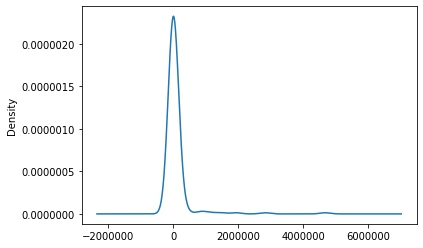

In [30]:
new_confirmed_deaths_recovered['total_confirmed'].plot.density()

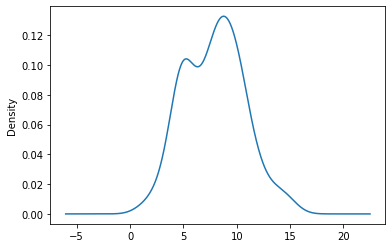

In [31]:
#try log to reach normal distribution
#get the log of the data
log_confirmed = (new_confirmed_deaths_recovered["total_confirmed"] + 1).apply(np.log) 

#plot density
log_confirmed.plot.density()

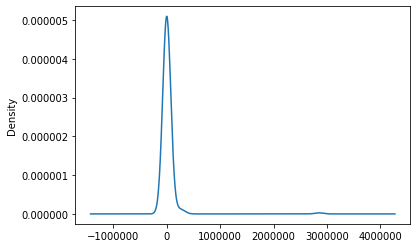

In [32]:
new_confirmed_deaths_recovered['total_recovered'].plot.density()

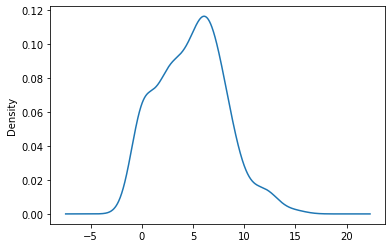

In [33]:
#try log to reach normal distribution
#get the log of the data
log_recovered = (new_confirmed_deaths_recovered["total_recovered"] + 1).apply(np.log) 

#plot density
log_recovered.plot.density()

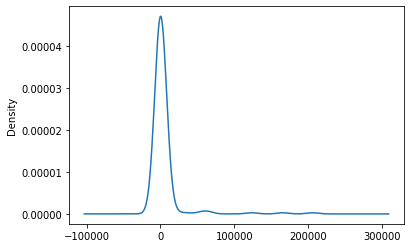

In [34]:
new_confirmed_deaths_recovered['total_deaths'].plot.density()

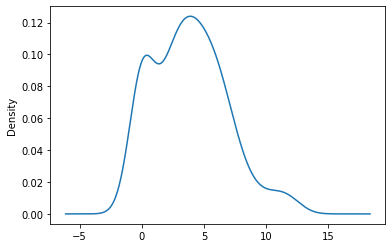

In [35]:
#try log to reach normal distribution
#get the log of the data
log_recovered = (new_confirmed_deaths_recovered["total_deaths"] + 1).apply(np.log) 

#plot density
log_recovered.plot.density()

We can begin our analysis now. The research question is: “How does the location of an individual affect their chance of recovering from the coronavirus?” 

Ideally, through analysis of the data, insight will be provided about which countries are handling the virus the most effectively. From this, other countries can observe their precautions and methods and hopefully provide better resources for their people.

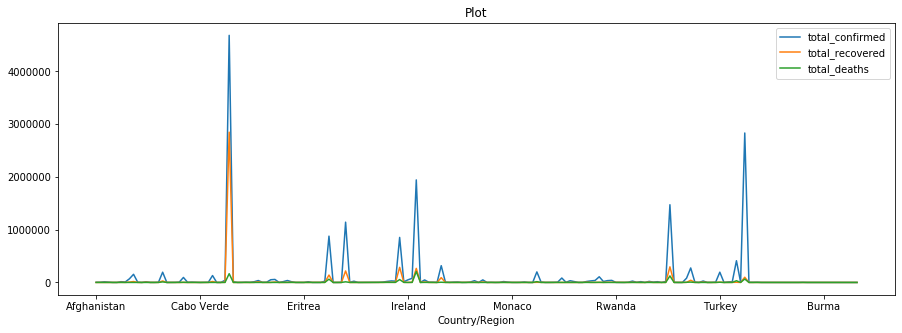

In [36]:
#let's try plotting all of them on the same graph
new_confirmed_deaths_recovered.plot(x='Country/Region', y=['total_confirmed', 'total_recovered', 'total_deaths'], figsize= (15, 5), title="Plot")

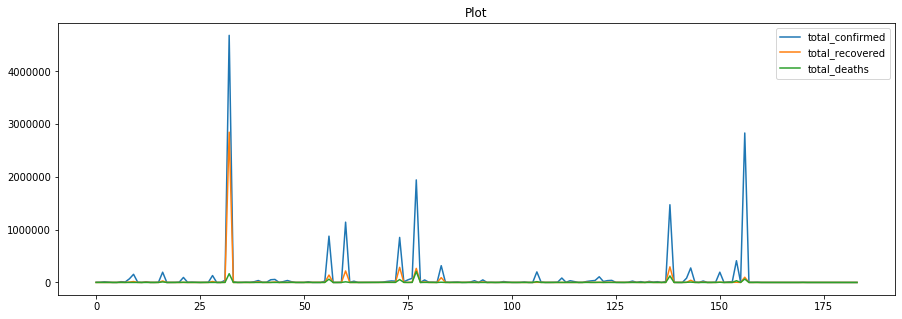

In [37]:
#we quickly realize that there are too many x values to be displayed on the axis, 
#so we can switch to using their index number so we can locate specific values
new_confirmed_deaths_recovered.plot(y=['total_confirmed', 'total_recovered', 'total_deaths'], figsize= (15, 5), title="Plot")

We can see that some countries really stand out in regards to confirmed cases and recovered. Let's try some other methods.

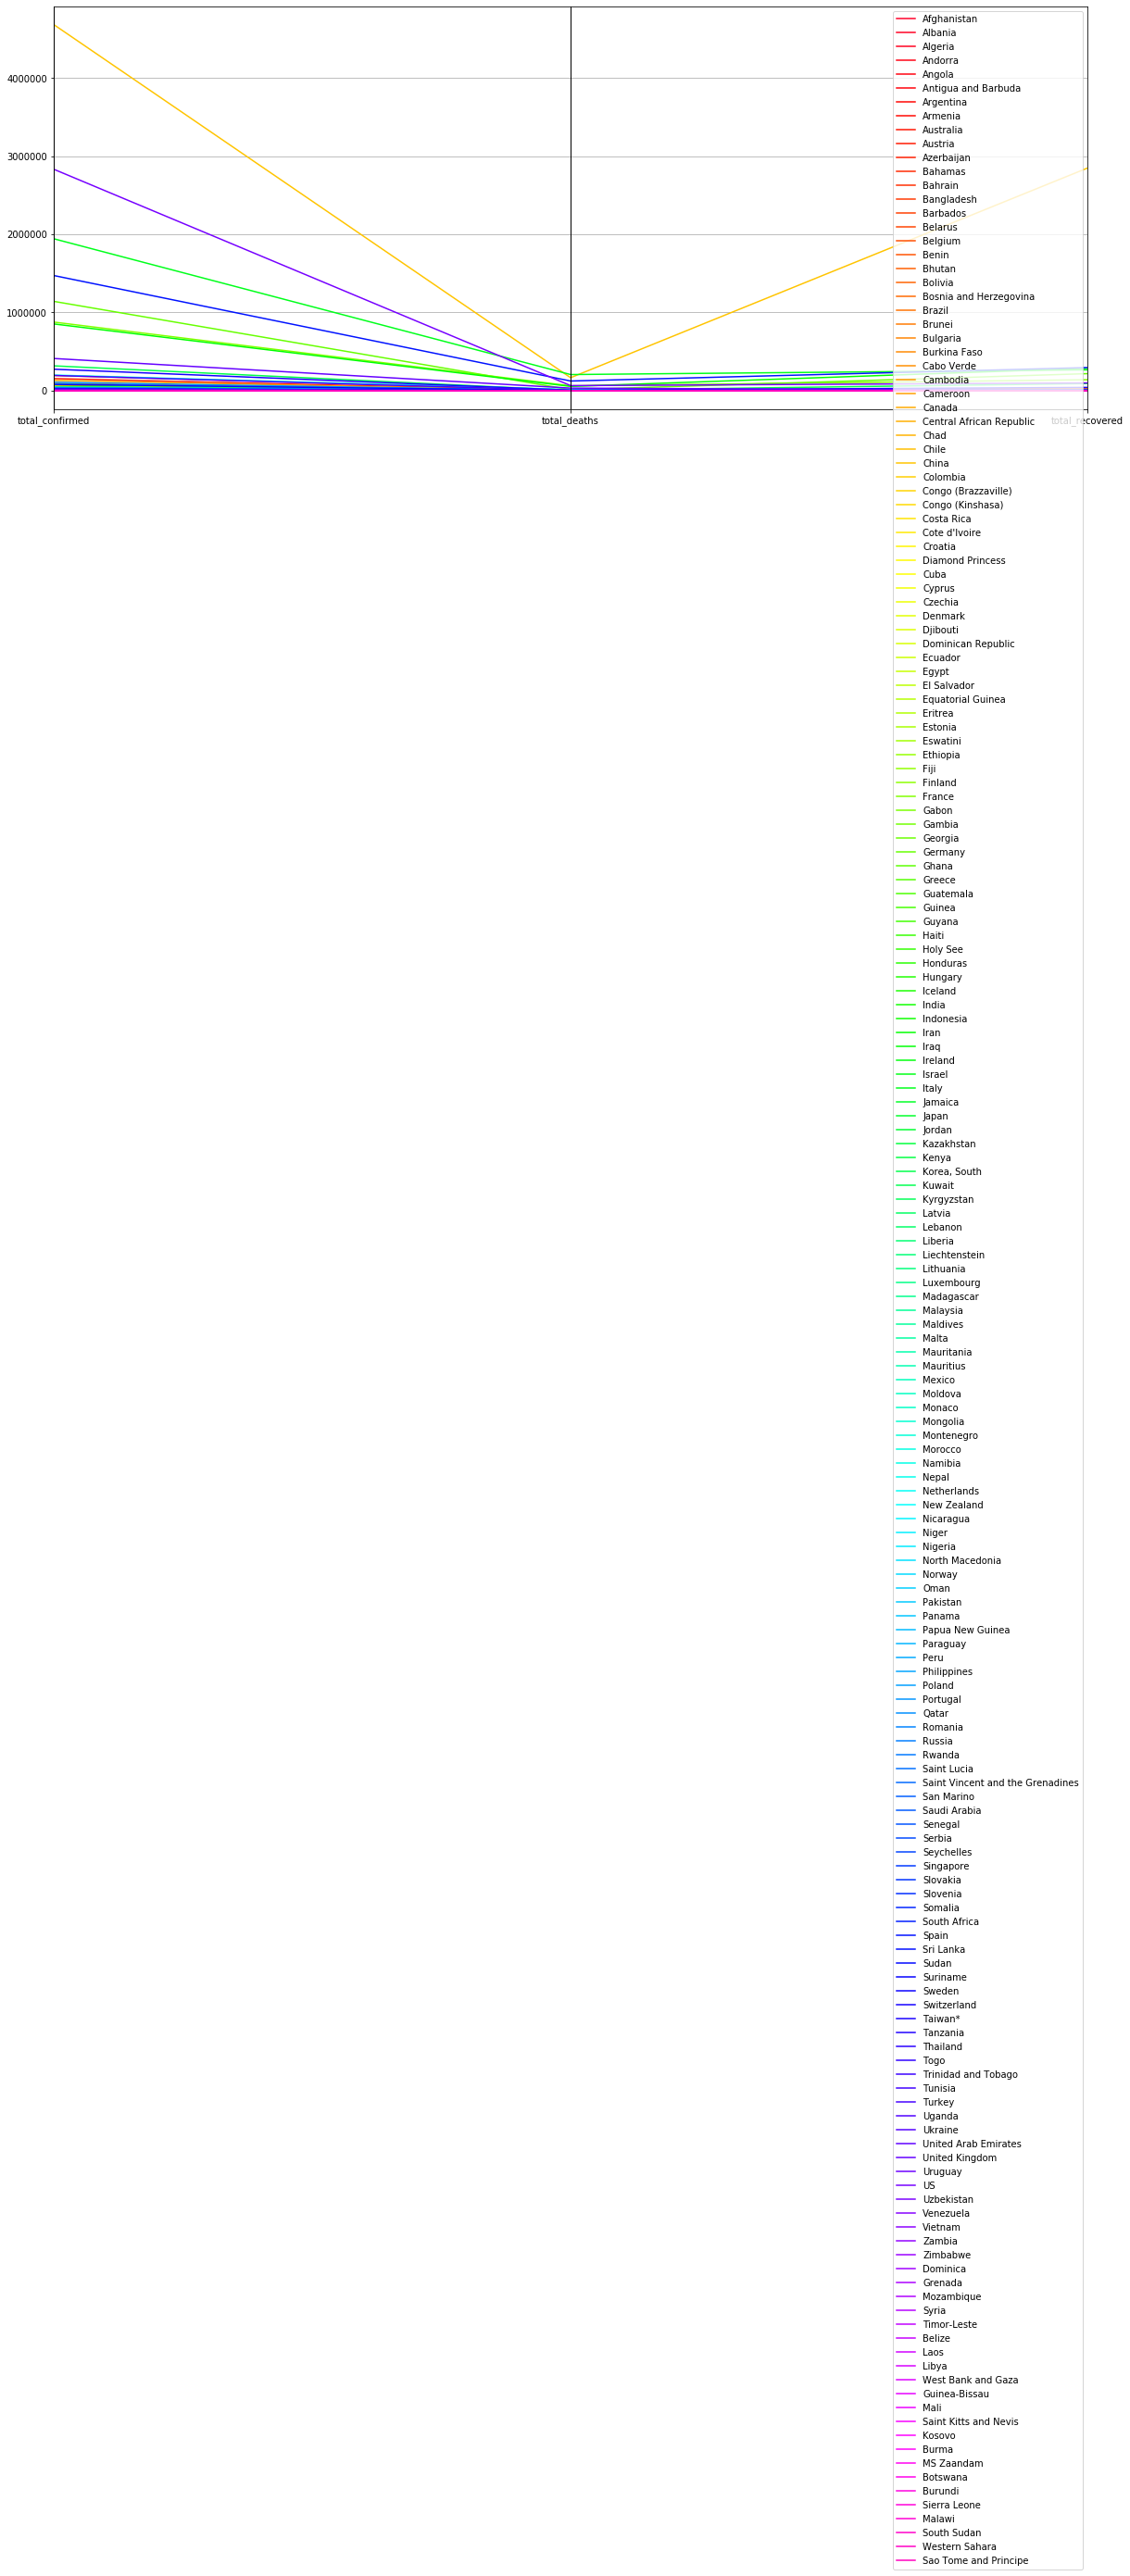

In [38]:
#let's try using parallel coordinates
from pandas.plotting import parallel_coordinates
from matplotlib.pyplot import figure
figure(figsize=(20, 8))
parallel_coordinates(new_confirmed_deaths_recovered, 'Country/Region', colormap='gist_rainbow')

This really shows the countries that have suffered the most, and is a good way of comparing all three totals at the same time. However, it is hard to locate countries of interest with a data set this big. Let's try one more visualization method.

In [1]:
#this one was more as a "for fun" thing I did, it looks cool, but it's pretty useless
#new_confirmed_deaths_recovered["Country/Region"].value_counts().sort_index().plot.pie(y='total_confirmed', subplots=False, figsize=(20, 20))

So at this point, we have a general sense of what the data set looks like. If we want to see which countries handle the virus the best, we can calculate the ratio of recovered cases to deaths, and we can try using the Naive Bayes Model to predict survivability in each area.

In [40]:
#let's create a copy of the dataframe and fill the nulls with zeroes, since the default is
#0/0 = NaN, we can jsut assume it's 0
recovered_deaths = new_confirmed_deaths_recovered.copy()
recovered_deaths['ratio'] = recovered_deaths['total_deaths']/recovered_deaths['total_recovered']
recovered_deaths = recovered_deaths.fillna(0)

In [41]:
#inf values result from dividing a number by 0, and we cannot substantially rely on them, so I
#choose to replace them with null and drop them
recovered_deaths = recovered_deaths.replace([np.inf, -np.inf], np.nan)

In [44]:
#drop the infs
recovered_deaths = recovered_deaths.dropna()
recovered_deaths.reset_index(drop=True, inplace=True)
recovered_deaths

,Country/Region,total_confirmed,total_deaths,total_recovered,ratio
0,Afghanistan,3031.0,70.0,94.0,0.744681
1,Albania,4143.0,200.0,792.0,0.252525
2,Algeria,11826.0,1028.0,1048.0,0.980916
3,Andorra,5536.0,140.0,151.0,0.927152
4,Angola,112.0,18.0,10.0,1.800000
...,...,...,...,...,...
172,Sierra Leone,23.0,0.0,0.0,0.000000
173,Malawi,19.0,0.0,0.0,0.000000
174,South Sudan,2.0,0.0,0.0,0.000000
175,Western Sahara,8.0,0.0,0.0,0.000000


In [43]:
#query to find top countries 
sorted_data = recovered_deaths.sort_values('ratio', ascending=True)

sorted_data[['Country/Region', 'ratio']].iloc[::]

,Country/Region,ratio
183,Sao Tome and Principe,0.000000
168,Laos,0.000000
44,Djibouti,0.000000
166,Timor-Leste,0.000000
164,Mozambique,0.000000
...,...,...
75,Ireland,6.472727
19,Bolivia,8.250000
131,Serbia,8.473684
154,United Kingdom,9.747538


From this listing, we can see the countries where a patient with coronavirus has the highest chance of recovering. So if the ratio is zero, the infected are 100% likely to make a recovery. Let's take a look at the non-zero values.

In [50]:
#let's isolate the relevant data
ratio = recovered_deaths[recovered_deaths.ratio != 0]
ratio

,Country/Region,total_confirmed,total_deaths,total_recovered,ratio
0,Afghanistan,3031.0,70.0,94.0,0.744681
1,Albania,4143.0,200.0,792.0,0.252525
2,Algeria,11826.0,1028.0,1048.0,0.980916
3,Andorra,5536.0,140.0,151.0,0.927152
4,Angola,112.0,18.0,10.0,1.800000
...,...,...,...,...,...
165,Syria,148.0,17.0,6.0,2.833333
169,Libya,120.0,5.0,2.0,2.500000
170,West Bank and Gaza,2552.0,12.0,335.0,0.035821
172,Mali,345.0,27.0,11.0,2.454545


In [51]:
#query to find top countries 
sorted_data = ratio.sort_values('ratio', ascending=True)

sorted_data[['Country/Region', 'ratio']].iloc[::]

,Country/Region,ratio
84,Kuwait,0.002549
107,New Zealand,0.008349
133,Singapore,0.008751
12,Bahrain,0.011942
113,Oman,0.014472
...,...,...
75,Ireland,6.472727
19,Bolivia,8.250000
131,Serbia,8.473684
154,United Kingdom,9.747538


Since the ratio was derived from taking deaths/recovered, the larger the ratio, the more likely the chance of death. However, the opposite is also true. The smaller the number of the ratio, the greater chance of recovery.

This method is flawed, however, since it only calculates recoverability and disregards other factors. For example, countries with very few cases could easily have a very high or low recoverability, and a number does not encompass the patients that are still ill or the resources a country has. As an alternative, I decided to give Naive Bayes a try.

In [58]:
#apply label encoder to columns
def label_encode(recovered_deaths, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(recovered_deaths[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(recovered_deaths[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        recovered_deaths[col] = col_values_transformed

In [59]:
#naive bayes
x = recovered_deaths[['total_confirmed','total_deaths']]
label_encode(x, x.columns.values)

y = recovered_deaths[['total_recovered']]
label_encode(y, y.columns.values)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 10)

/Users/dragon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [60]:
#apply model
nb = GaussianNB()
nb.fit(x_train, y_train.values.ravel())
y_pred = nb.predict(x_test)
y_pred

array([ 4,  4,  4,  4,  4,  4,  4,  4,  0,  4,  4, 30,  4,  4,  4, 30,  4,
        4,  4,  0,  4,  0,  4,  0,  0,  8, 10,  8,  4,  4,  4,  0,  8,  0,
        0,  0,  0,  4,  4,  4,  8,  4,  0,  4,  9,  4,  4,  4,  4,  4,  4,
        4,  4, 10,  0,  4,  4,  4,  8])

In [61]:
#accuracy (yikes!!)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.15254237288135594


In [64]:
#10 fold cross validation
scores = cross_val_score(nb, x, y.values.ravel(), cv=10)
print(scores)
print('Cross-validated score:', scores.mean())

/Users/dragon/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.17647059 0.11764706 0.11764706]
Cross-validated score: 0.11895424836601307


Alright, so Naive Bayes clearly can't help us here. From our two attempts to answer the question "which countries handle the virus the best," it seems that using the ratio is the more reliable method. 

We do need to keep in mind the drawbacks of this; it doesnt account for many factors, and to gain a more well-rounded view of different countries' different solutions to this virus, more resaerch must be done. However, this is a good starting point to see which countries are doing well, and use that to observe more trends.

In [39]:
cdr = new_confirmed_deaths_recovered.copy()
cdr.drop('Country/Region', axis = 'columns', inplace = True)

In [46]:
cdr_std = StandardScaler().fit_transform(cdr)

sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(cdr_std)

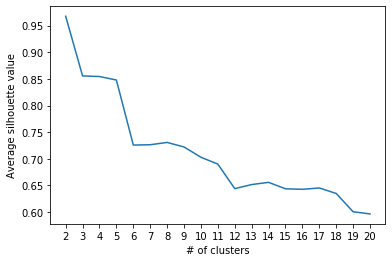

In [47]:
silhouette = []
for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(cdr)
    silhouette.append(silhouette_score(cdr,kmeans.labels_))
    
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(range(2,21),silhouette)
ax.set_xlabel('# of clusters')
ax.set_ylabel('Average silhouette value')
plt.xticks(np.arange(2, 21, step=1))
plt.show()

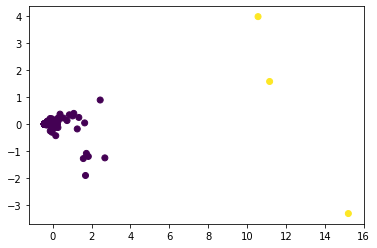

In [48]:
kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(cdr)
plt.scatter(x=Y_sklearn[:,0],y=Y_sklearn[:,1],c=kmeans_2.labels_)

In [49]:
print("The variance explained by the two first principal components is: ", sum(sklearn_pca.explained_variance_ratio_))

The variance explained by the two first principal components is:  0.9906642094366757


There is no overlap for the clusters. The first two components capture 99% of the variance in the data. This clustering tells us that there are two clusters, but when we look at the plot it looks more like one main cluster and other outliers. We can't make any clear conclusions from this. 